# Programming for Data Science and Artificial Intelligence

## 4 Matplotlib

### Readings: 
- [VANDER] Ch4
- https://matplotlib.org/3.2.2/contents.html

Matplotlib is a data visualization library built on NumPy arrays.  It was conceived by John Hunter in 2002, originally as a patch to IPython for enabling interactive MATLAB-style plotting via gnuplot from the IPython command line. One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends. Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish. 

Recent Matplotlib versions make it relatively easy to set new global plotting styles, and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, Seaborn, ggpy, HoloViews, Altair, and even Pandas itself can be used as wrappers around Matplotlib's API. Even with wrappers like these, it is still often useful to dive into Matplotlib's syntax to adjust the final plot output.


### Importing Matplotlib

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### Setting Styles

In [2]:
# listing all possible styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
# Use plt.style.use() to choose appropriate aesthetic styles.
plt.style.use('seaborn')

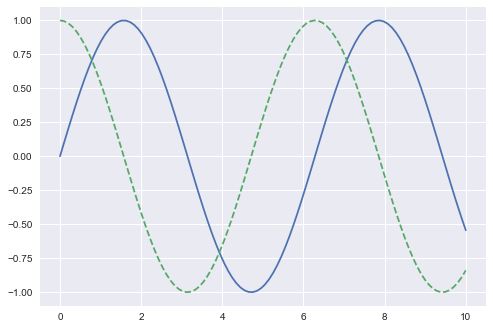

In [4]:
# now the plot will embed a PNG image of the resulting graphic
import numpy as np
x   = np.linspace(0, 10, 100)
fig = plt.figure()

plt.plot(x, np.sin(x), '-') 
plt.plot(x, np.cos(x), '--')

### Two possible (confusing?) interface

#### 1. MATLAB-style

'\n- important to note that this api is stateful.  plt is a global variable\nthat keep track of all figure and axes.  One potential problem is that\nit is difficult to edit the first figure once you come to the second figure\nsince the pointer has already pointed to the second plot\n'

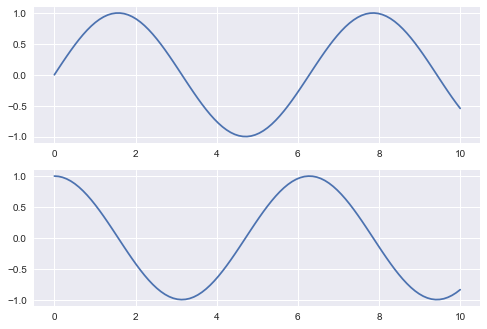

In [5]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1)  #(row, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

'''
- important to note that this api is stateful.  plt is a global variable
that keep track of all figure and axes.  One potential problem is that
it is difficult to edit the first figure once you come to the second figure
since the pointer has already pointed to the second plot
'''

#### 2. OO style

'\nIn the OO style, it is working upon individual objects\n'

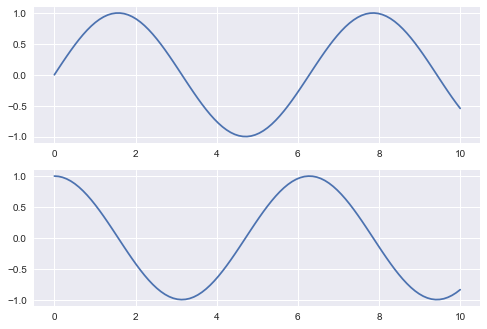

In [6]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)  # notice the 's' there!!

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

'''
In the OO style, it is working upon individual objects
'''

### Simple Line Plots

For all Matplotlib plots, we start by creating a figure and an axes.  The figure is a single container that contains all the objects like axes, graphics, text, and labels.   The axes represent the bounding box, e.g., ticks and labels.

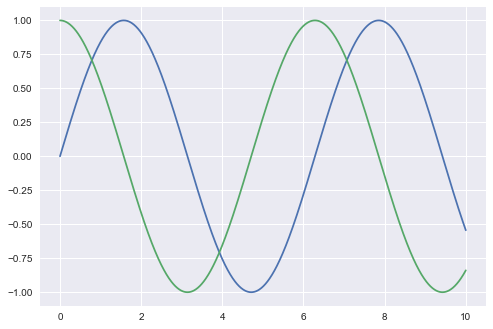

In [7]:
# object oriented way
import numpy as np

fig = plt.figure()
ax  = plt.axes()  # get the instance of axes from plt

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x)) # x, y
ax.plot(x, np.cos(x)) 

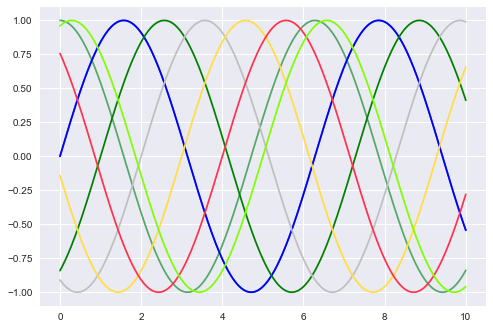

In [8]:
# matlab way - actually simpler
plt.plot(x, np.sin(x))  #x, y
plt.plot(x, np.cos(x))

# many color options
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

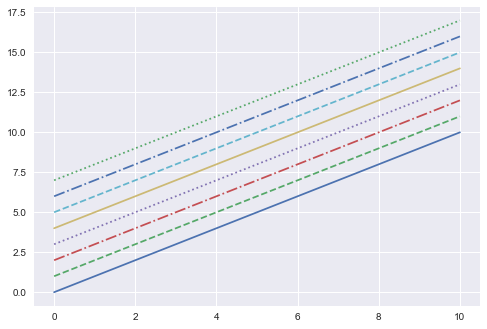

In [9]:
# line options
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':'); # dotted

# check help(plt.plot)  for all possible styles

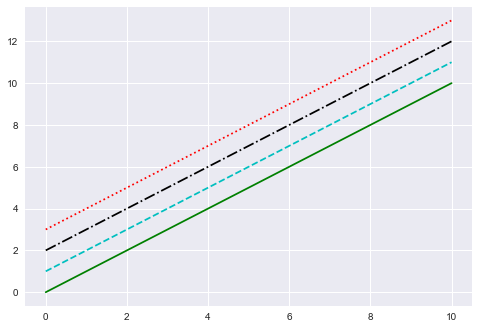

In [10]:
# combine color and line options
plt.plot(x, x + 0, 'g-')  # solid green  # order does not matter
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r'); # dotted red

(-1.5, 1.5)

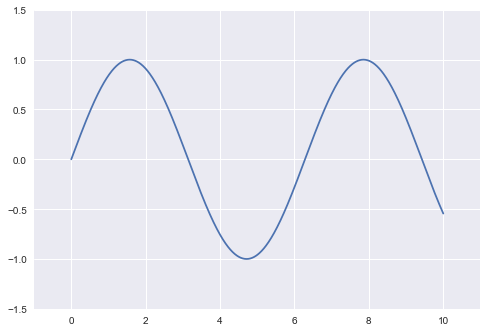

In [11]:
# plot x y limits
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5) # you can also reverse!

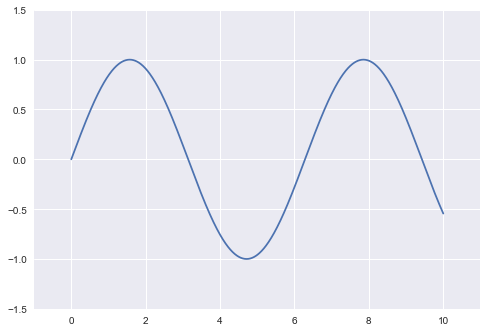

In [12]:
# lazy to write two sentence, use plt.axis!
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);  # xlim1, xlim2, ylim1, ylim2
# plt.axis('tight')  #other options  - 'equal'; help(plt.axis)

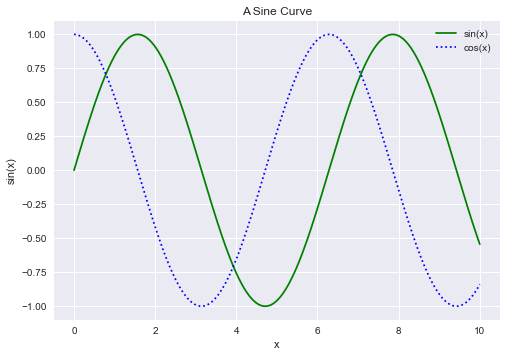

In [13]:
# labeling
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.title("A Sine Curve")
plt.legend()
plt.xlabel("x")
plt.ylabel("sin(x)");

#### How about OO styles?

Most plt functions translate directly to ax methods (such as plt.plot() → ax.plot(), plt.legend() → ax.legend(), etc.), this is not the case for all commands. In particular, functions to set limits, labels, and titles are slightly modified. For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

    plt.xlabel() → ax.set_xlabel()
    plt.ylabel() → ax.set_ylabel()
    plt.xlim()   → ax.set_xlim()
    plt.ylim()   → ax.set_ylim()
    plt.title()  → ax.set_title()

In the object-oriented interface to plotting, rather than calling these functions individually, it is  more convenient to use the ax.set() method, to set everything at once:

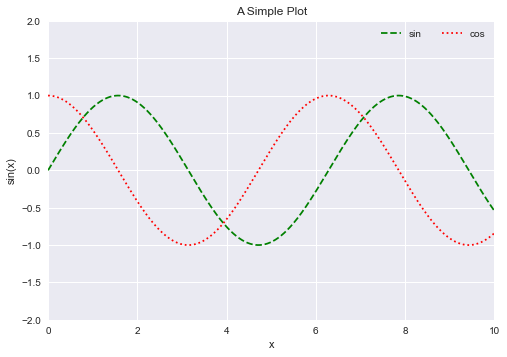

In [14]:
ax = plt.axes()
ax.plot(x, np.sin(x), '--g', label='sin')  # label for legend
ax.plot(x, np.cos(x), ':r', label='cos')
ax.legend(ncol = 2)
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',   # label for axis
       title='A Simple Plot');

### Scatter plots

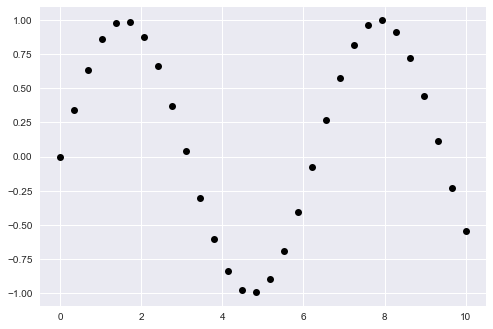

In [15]:
# we can simply use plt.plot but with different shapes to create scatter plot
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

(0.0, 1.8)

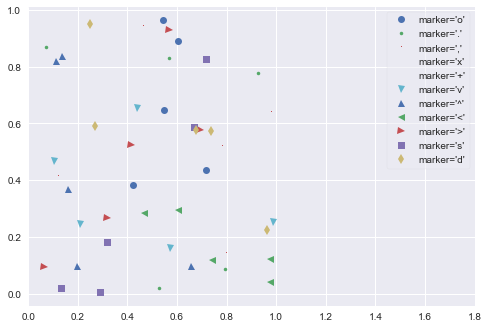

In [16]:
# many possible markers!
rng = np.random.RandomState(0)

for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(loc='upper right', frameon=True, 
          fancybox=True, framealpha=0.5)  # can accept parameters like location, whethers has border, round edges
plt.xlim(0, 1.8)

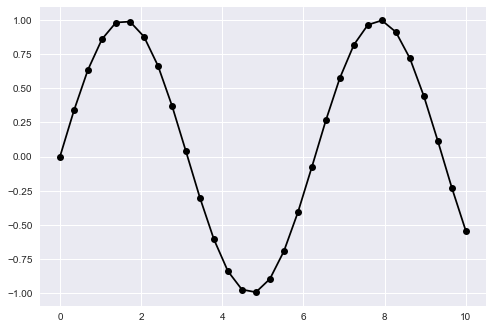

In [17]:
# combine colors, line styles, and marker styles
plt.plot(x, y, '-ok');  # k = black, o = dots, - = line

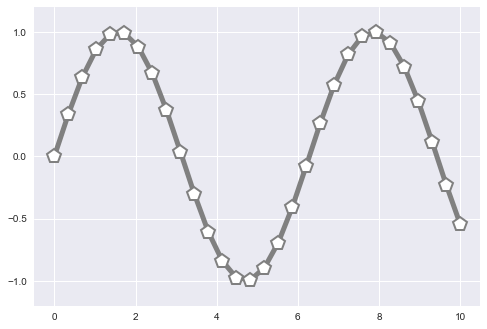

In [18]:
# additional arguments like markersize, markerfacecolor, edgecolor
plt.plot(x, y, '-p', color='gray',   #p = pentagon
         markersize=15, linewidth=5,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

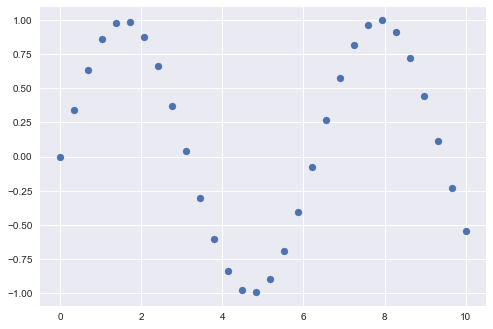

In [19]:
# python guys also decided to create a wrapper for easier use of scatterplot
# providing plt.scatter
plt.scatter(x, y, marker='o')

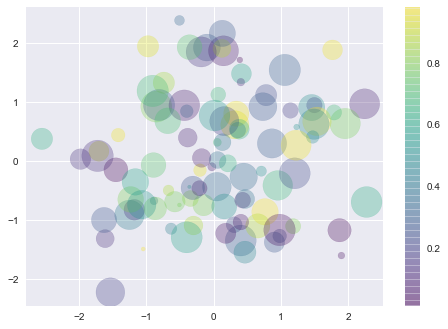

In [20]:
# The primary difference of plt.scatter from plt.plot is that it can 
# be used to create scatter plots where the properties of each individual 
# point (size, face color, edge color, etc.) can be individually 
# controlled or mapped to data.
# plt can also accept x, and y in the form of (n, ), also s = (n, )
rng = np.random.RandomState(0)
x   = rng.randn(100)
x.shape  #shape of (n, )
y   = rng.randn(100)
colors = rng.rand(100)
sizes  = 1000 * rng.rand(100)

# print(x, y, sizes)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar()  # show color scale

For example, we might use the Iris data from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured:

Text(0, 0.5, 'sepal width (cm)')

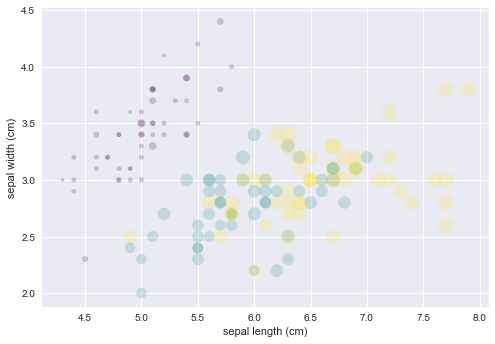

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()

#print(iris.data.shape)

features = iris.data.T

#print(features.shape)  #four features
#print(features[0].shape)

# sepal length and width for x1, x2
# size for petal width
# color for y
plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

In [22]:
## so which one you should use?  plt.plot is more efficient for big datasets

### Errorbars

<ErrorbarContainer object of 3 artists>

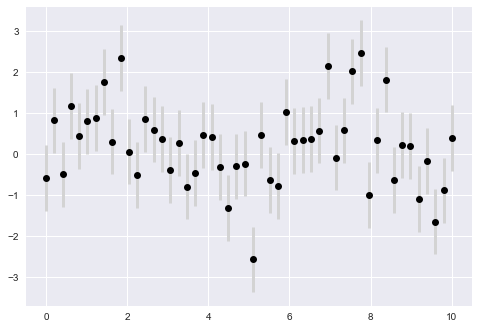

In [23]:
# use plt.errorbar
x  = np.linspace(0, 10, 50)
dy = 0.8
y  = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='ok', ecolor='lightgray',
            elinewidth=3, capsize=5)  # capsize is the bar on top and bot

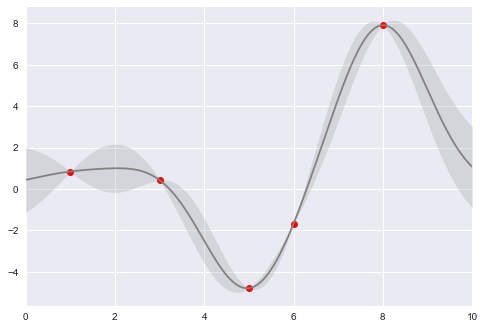

In [24]:
### Continuous errors
# Let's say you plot a line, and you would like to know the areas of 
# errors.  Use fill_between()

from sklearn.gaussian_process import GaussianProcessRegressor as GP

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GP().fit(xdata[:, np.newaxis], ydata)

xfit  = np.linspace(0, 10, 1000)
yfit, sigma = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 1.96 * sigma  # 95% confidence region

# Visualize the result
plt.plot(xdata, ydata, 'or')  #red circle
plt.plot(xfit, yfit, '-', color='gray')   #fitted by guassian

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

### Histograms

(array([ 3.,  5.,  6.,  6., 10., 18., 20., 21., 42., 48., 62., 63., 81.,
        71., 78., 76., 86., 71., 46., 50., 31., 20., 30., 17., 13., 12.,
         8.,  1.,  3.,  2.]),
 array([-2.82648215, -2.62967206, -2.43286196, -2.23605187, -2.03924178,
        -1.84243168, -1.64562159, -1.44881149, -1.2520014 , -1.05519131,
        -0.85838121, -0.66157112, -0.46476102, -0.26795093, -0.07114084,
         0.12566926,  0.32247935,  0.51928944,  0.71609954,  0.91290963,
         1.10971973,  1.30652982,  1.50333991,  1.70015001,  1.8969601 ,
         2.0937702 ,  2.29058029,  2.48739038,  2.68420048,  2.88101057,
         3.07782067]),
 <BarContainer object of 30 artists>)

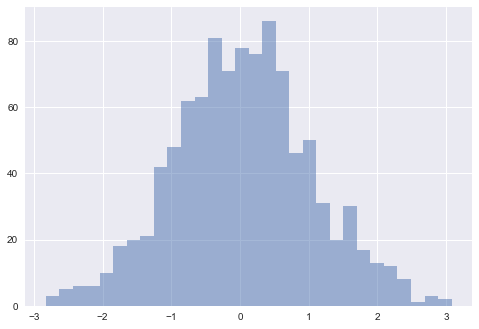

In [25]:
# A simple histogram can be a great first step in understanding a dataset. 
data = np.random.normal(0, 1, 1000)  # 1000 numbers between [0, 1)
plt.hist(data, bins=30, alpha=0.5)  # x should be in the shape of (n, )

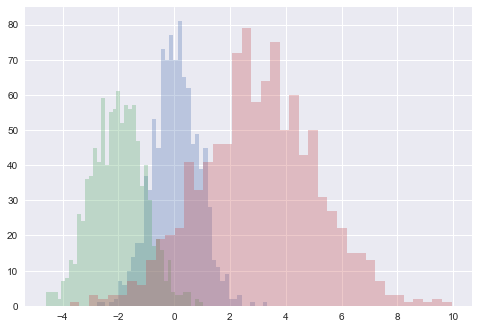

In [26]:
# .hist also accepts a keyword arguments
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

### Colorbars

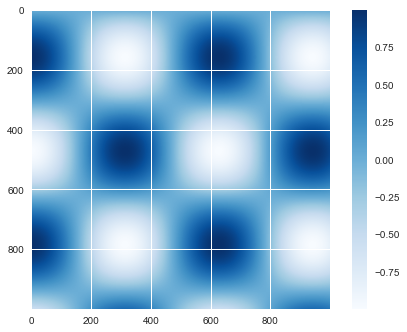

In [27]:
### colorbar created using plt.colorbar
x = np.linspace(0, 10, 1000)
I = np.sin(x[:, np.newaxis]) * np.cos(x)  #so that I is in shape of (M, N)  where M and N can be any number

# a lot of cmap to choose
# try plt.cm.<TAB>
plt.imshow(I, cmap = 'Blues')
# plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))  #for discrete color map

plt.colorbar()

### Multiple subplots

plt subplot takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

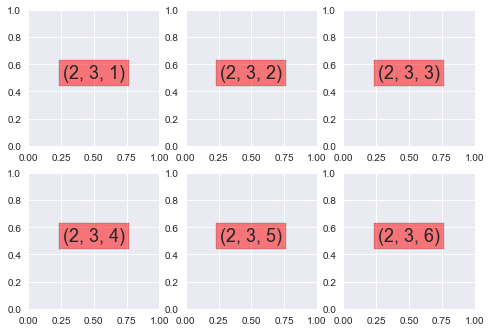

In [28]:
# matlab style
for i in range(1, 7):
    plt.subplot(2, 3, i)
    # plt.text (x, y, string) (0, 0) lower left to (1, 1) upper right
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, horizontalalignment='center',
             bbox=dict(facecolor='red', alpha=0.5))

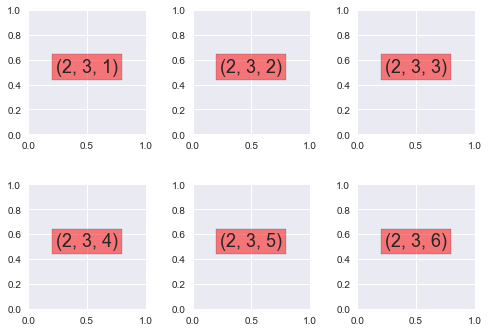

In [29]:
# oo style
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, horizontalalignment='center',
             bbox=dict(facecolor='red', alpha=0.5))

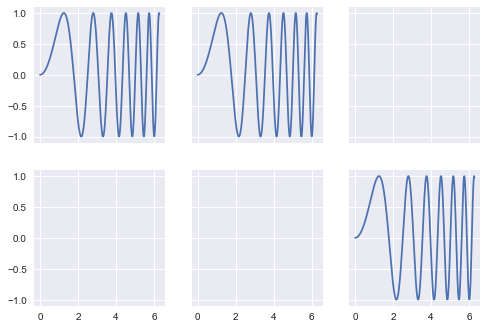

In [30]:
# plt.subplot(s)  - Note the s at the end
# a more efficient way to plot many at the same time

# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
ax[0, 0].plot(x, y)  # row cols
ax[0, 1].plot(x, y)
ax[1, 2].plot(x, y)

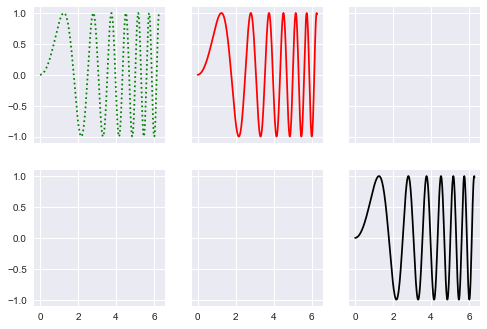

In [31]:
# use tuple way
# return ax1 for first row, and ax2 for second row
fig, (ax1, ax2) = plt.subplots(2, 3, sharex='col', sharey='row')
ax1[0].plot(x, y, ':g')
ax1[1].plot(x, y, '-r')
ax2[2].plot(x, y, '-k')

### More complicated arrangements!!  (similar to Bootstrap grid sys.)

<AxesSubplot:>

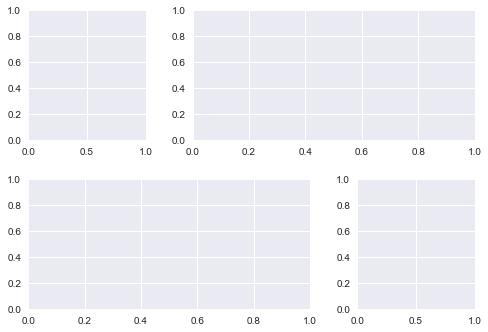

In [32]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

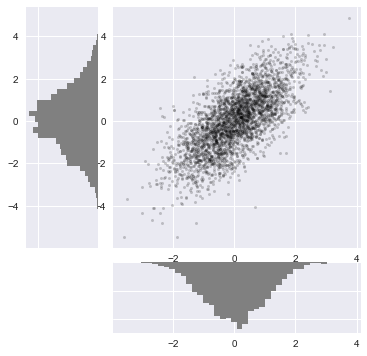

In [33]:
# good example is to use when you want to show distribution
# along the x and y distribution

# Create some normally distributed data
mean = [0, 0]
cov  = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T  #swap the axis, and assign first sample to x, second sample to y

# Set up the axes with gridspec
fig     = plt.figure(figsize=(6, 6))
grid    = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist  = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist  = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, bins = 40,
            orientation='vertical', color='gray')
x_hist.invert_yaxis()  #to flip the graph horizontally

y_hist.hist(y, bins = 40,
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()  #to flip the graph vertically

### Annotation

Text(3, 6, 'curve up')

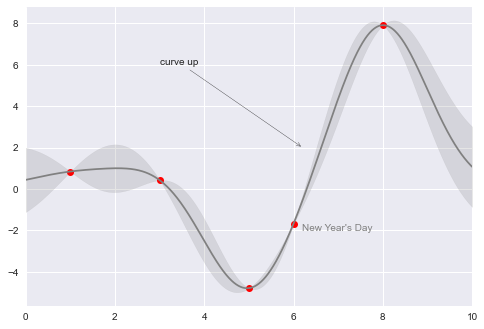

In [34]:
from sklearn.gaussian_process import GaussianProcessRegressor as GP

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GP().fit(xdata[:, np.newaxis], ydata)

xfit        = np.linspace(0, 10, 1000)
yfit, sigma = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit       = 1.96 * sigma  # 95% confidence region

# Visualize the result
plt.plot(xdata, ydata, 'or')  #red circle
plt.plot(xfit, yfit, '-', color='gray')   #fitted by guassian

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10)

# add labels to the plot
style = dict(size = 10, color='gray')
plt.text(6.2, -2, "New Year's Day", **style)  #can simply put color
plt.annotate('curve up', xy=(6.2, 2), xytext=(3, 6),  #xytext ---> xy
            arrowprops=dict(arrowstyle="->"))

# there are many plot styles!
# publish-ready without any photoshop touch!  cool right?
# https://matplotlib.org/3.2.1/tutorials/text/annotations.html


### === Task 1 ===

1. Given $$y = 2x - 5 + 20 * noise$$, where noise is value between 0 and 10, generate x with 500 values between 0 and 1.  Then generate the corresponding y.

2. Plot the above with a scatter plot.

3. Plot a line $y = 2x - 5$ on top of this scatter plot.

4. Given a function called sigmoid with $$y = 1 / (1 + np.exp(-x))$$, generate x as points from -5 to 5, then generate the corresponding y.  Plot the scatter graph.  Set the title to "Sigmoid" function, and set the xlabel to "x", and ylabel to "y"

5. Go to sklearn.datasets and research about <code>make_classification</code> API.  Using this API, generate 500 samples, with n_features=10.  Then plot the scatter graph of the first two features with color equals to their class, marker = 'o', size = 25, and edgecolor = black. <br>
See: 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification<br>
https://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html
6. Load the iris datasets from sklearn.  Set X as **the first two features**, and y as the target.  Plot them in a scatter plot with color as their class.  Add some grid to the plot.

7. I don't remember how do I get this plot.  Do you mind to reconstruct the following plot for me?  What I remember is that the dataset looks like this:

<img src = "figures/exercise.png">

<code>
    x_neg = np.array([[3,4],[1,4],[2,3]])
    y_neg = np.array([-1,-1,-1])
    x_pos = np.array([[6,-1],[7,-1],[5,-3],[2,4]])
    y_pos = np.array([1,1,1,1])
    x1 = np.linspace(-10,10)
</code>

Hint: https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html <br>
https://matplotlib.org/stable/gallery/color/named_colors.html<br>

8. Given this data

<code>
    X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0, return_centers=True)
    plt.scatter(X[:, 0], X[:, 1], s=50);
</code>

Plot four big circles roughly on their centers.  Set the transparency of these circles to be around 0.5, their size to be 200, and their color to be black.   Look something like this:

<img src = "figures/exercise2.png">



In [35]:
# 1.
size = 500
noise = np.random.uniform(0,1, size)
x = np.linspace(0,10,500)
y1 = 2*x - 5 + 20*noise

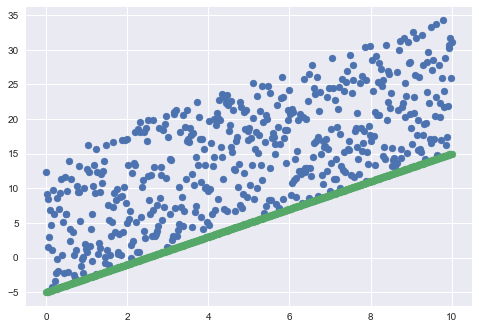

In [36]:
# 2.
plt.scatter(x,y1)
# 3.
y2 = 2*x - 5
plt.scatter(x,y2)

Text(0.5, 1.0, 'Sigmoid')

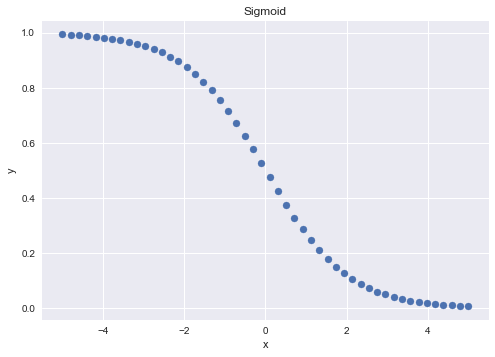

In [37]:
# 4.
x3 = np.linspace(-5,5)
y3 = 1/(1 + np.exp(x3))
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sigmoid")

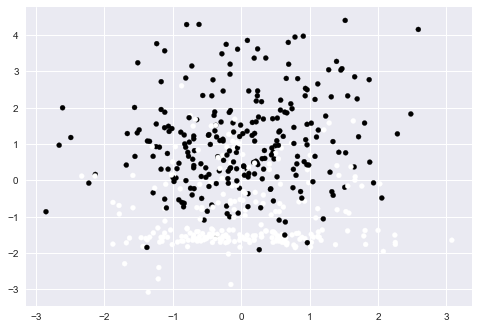

In [38]:
# 5.
import sklearn
x, y = sklearn.datasets.make_classification(n_samples=500, n_features=10)

plt.scatter(x[:,0],x[:,1], marker='o', c=y, s=25)



### 3D Plotting

We can enable 3D plotting by importing the <code>mplot3d</code> library, which comes with your standard Matplotlib installation via pip. Just be sure that your Matplotlib version is over 1.0.
Once this sub-module is imported, 3D plots can be created by passing the keyword <code>projection="3d"</code> to any of the regular axes creation functions in Matplotlib:

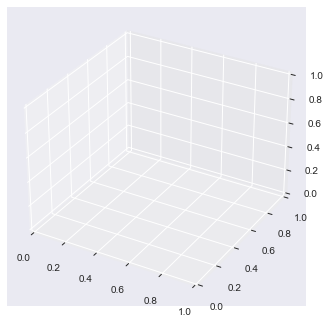

In [39]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax  = plt.axes(projection="3d")

plt.show()

The 3D plotting functions are quite intuitive: instead of just scatter we call scatter3D , and instead of passing only x and y data, we pass over x, y, and z. All of the other function settings such as colour and line type remain the same as with the 2D plotting functions.

#### 3D Scatter and Line Plots

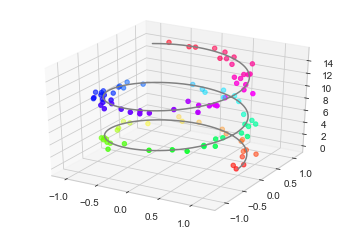

In [37]:
fig = plt.figure()
ax  = plt.axes(projection="3d")

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = 15 * np.random.random(100)
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()

#### Surface Plots

Surface plots can be great for visualising the relationships among 3 variables across the entire 3D landscape. They give a full structure and view as to how the value of each variable changes across the axes of the 2 others.

Constructing a surface plot in Matplotlib is a 3-step process.

1. First we need to generate the actual points that will make up the surface plot. Now, generating all the points of the 3D surface is impossible since there are an infinite number of them! So instead, we’ll generate just enough to be able to estimate the surface and then extrapolate the rest of the points. We’ll define the x and y points and then compute the z points using a function.

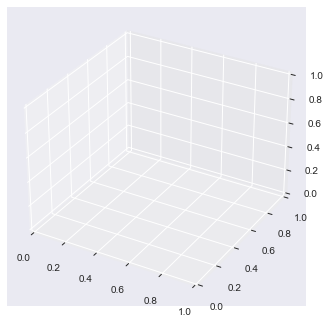

In [40]:
fig = plt.figure()
ax  = plt.axes(projection="3d")
def z_function(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z    = z_function(X, Y)

2. The second step is to plot a wire-frame — this is our estimate of the surface.

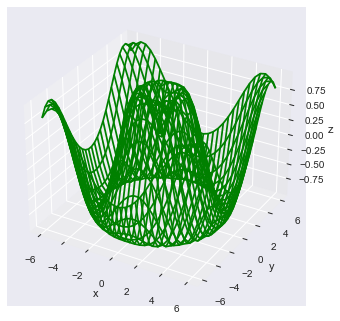

In [41]:
fig = plt.figure()
ax  = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color='green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

3. Finally, we’ll project our surface onto our wire-frame estimate and extrapolate all of the points.

Text(0.5, 0.92, 'surface')

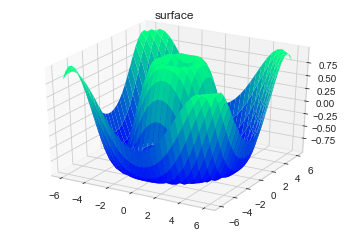

In [40]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='winter', edgecolor='none')
ax.set_title('surface')

#### 3D Bar Plots

We’ll select the z axis to encode the height of each bar; therefore, each bar will start at z = 0 and have a size that is proportional to the value we are trying to visualise. The x and y positions will represent the coordinates of the bar across the 2D plane of z = 0. We’ll set the x and y size of each bar to a value of 1 so that all the bars have the same shape.

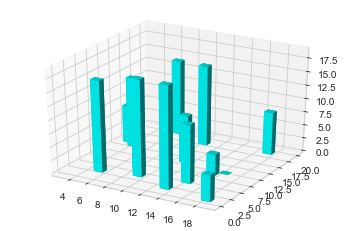

In [41]:
import random

fig = plt.figure()
ax  = plt.axes(projection="3d")

num_bars = 15
x_pos  = random.sample(list(range(20)), num_bars)
y_pos  = random.sample(list(range(20)), num_bars)
z_pos  = [0] * num_bars
x_size = np.ones(num_bars)
y_size = np.ones(num_bars)
z_size = random.sample(list(range(20)), num_bars)

ax.bar3d(x_pos, y_pos, z_pos, x_size, y_size, z_size, color='aqua')
plt.show()

### Date Tick Labels

You can use <code>.set_major_locator</code>, <code>.set_major_formatter</code>, <code>.set_minor_locator</code> to format the ticks

/Users/chaklam/DSAI/Environments/teaching_env/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


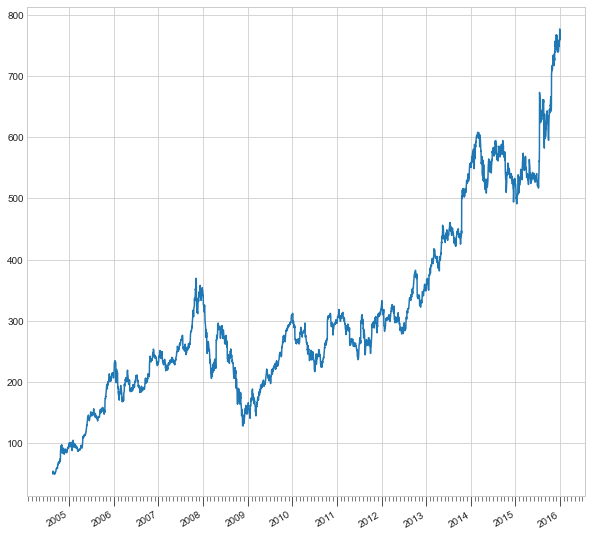

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams.update({'xtick.labelsize': 10, 'xtick.major.size': 10,
                    'xtick.minor.size': 5})

#to get all the avail keys:
# plt.rcParams.keys

years     = mdates.YearLocator()   # every year
months    = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                      data_source='yahoo')

goog = goog['Adj Close']

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(goog)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

### Tables

We can use <code>.table</code> to embed some table information into the graph

[0. 0. 0. 0. 0.]
['66.4', '174.3', '75.1', '577.9', '32.0']
['124.6', '555.4', '153.2', '677.2', '192.5']
['213.8', '636.0', '305.7', '1175.2', '796.0']
['292.2', '717.8', '456.4', '1368.5', '865.6']
['431.5', '1049.4', '799.6', '2149.8', '917.9']


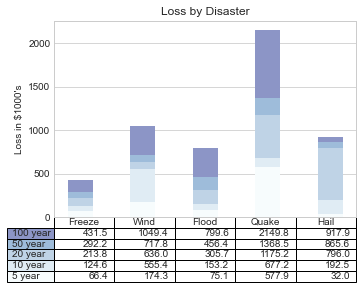

In [43]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows    = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

# position of the bars
index = np.arange(len(columns)) + 0.3

bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

print(y_offset)

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    print(['%1.1f' % (x / 1000.0) for x in y_offset])
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

### === Task 2 ===

1. Load the iris data, set the first two columns as X, and set the y as target

2. Then <code>from sklearn import svm</code>.  This will load a classification machine learning algorithm called SVM (Support Vector Machines).  For now, we shall not discuss much what is it, but we just need to know it is for classification.

3. We shall let this algorithm find some patterns n our iris data, and hopefully and separate the class for us.  To do so, we do 

<code>model = svm.SVC(kernel='linear').fit(X, y)</code>

4. Then, before we can actually do some prediction, let's prepare some thing.  Let's find the mininum and maximum of each feature value, i.e., 

<code>
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
</code>

5. In order to plot the decision boundary, we need to use something called contour plot which is a 3D plot in 2D.  To use contour, we need to provide three coordinates, x, y, z.  To get z, we need to find all the possible pairs of x and y, before we can get z.  Thus, let's perform all possible values from x and y using this code:

<code>
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
              np.arange(y_min, y_max, 0.2))
</code>

6. Print these xx, and yy.  What is the relationship of these values with x and y?  What is the role of 0.2?

7. We can now create Z by using this function

<code>
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
</code>

8. Research a bit, what is ravel()?, and what does predict() do?

9.  Plot the graph using

<code>
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
</code>

10. Why do we want to reshape Z to xx.shape?  What is cmap?

11. Plot the training points on top of the contour plot with

<code>
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
</code>

Set the graph xlim to xx.min() and xx.max(); ylim to yy.min() and yy.max().  Set the xlabel to "Sepal length", and ylabel to "Sepal width".  Finally, add xticks() and yticks(), and whatever title you like.

Finally, it should look like this:

<img src = "figures/exercise3.png">